# 04-approach-to-machine-learning-algorithm

Use the "Run" button to execute the code.

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import os
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Business Requirements
2. Problem Identification
3. Data Cleaning
4. Data Preparation
5. Baseline Model
6. Model Training and Evaluation
7. Regularization and Ensembling
8. Interpretation and Presentation

## 1. Business Requirement
- What to solve ??
- Why we are interested in solving that problem ??
- How it is currecntly being solved ??
- How the model and it's result is going to use ??
- How much historical data we have ??
- What feature data have ??
- Issues with data (missing values, errors, differences in units, etc)
- Look at some sample rows
- Where is data stored right now ??

## 2. Problem Classification
- Regression Problem
- Loss function : Root Mean Square Percentage Error (RMSPE)

## 3. Data Cleaning

In [ ]:
od.download('https://www.kaggle.com/competitions/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maheshkrishnam
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 43.3MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [ ]:
os.listdir('rossmann-store-sales')

['test.csv', 'sample_submission.csv', 'store.csv', 'train.csv']

In [ ]:
train_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)


In [ ]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


- Average Sales = 5773
- Average Customers = 633
- 38% days --> promotion ON
- 83% days --> OPEN

In [ ]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

- No null data in train.csv

In [ ]:
store_df = pd.read_csv('./rossmann-store-sales/store.csv')

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
merged_df_train = train_df.merge(store_df, how='left', on='Store')

In [ ]:
merged_df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
test_df = pd.read_csv('./rossmann-store-sales/test.csv')

In [ ]:
merged_df_test = test_df.merge(store_df, how='left', on='Store')

In [ ]:
merged_df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [ ]:
merged_df_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [ ]:
merged_df_train.duplicated().sum()

0

In [ ]:
merged_df_train['Date'] = pd.to_datetime(merged_df_train['Date'])
merged_df_test['Date'] = pd.to_datetime(merged_df_test['Date'])

In [ ]:
merged_df_train.Date.min(), merged_df_train.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [ ]:
merged_df_test.Date.min(), merged_df_test.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

- Train data is of 2 years and 7 months
- But there is an issue with the test data, that it is available for 1 months and 17 days only, which may be not give a good accuracy when predcted over this small of time

### EDA
- Study the distribution of individual columns
- Detect anamolies or error in data
- Study the relationship of target with other features
- Gather indights about the problem and dataset
- Come up with ideas for preprocessing and feature engineering

<Axes: xlabel='Sales', ylabel='Count'>

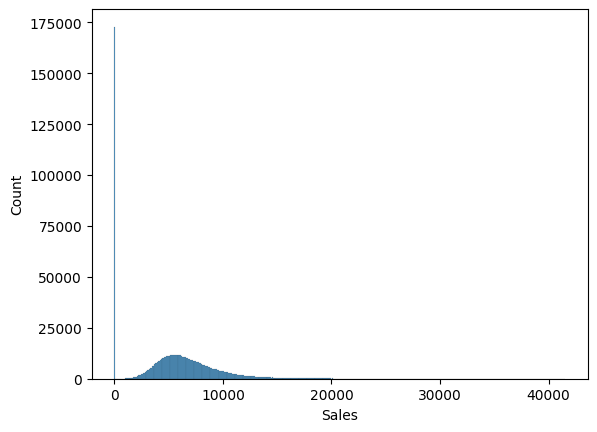

In [ ]:
sns.histplot(data=merged_df_train, x='Sales')

- Sales follows a normal distribution

In [ ]:
merged_df_train.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [ ]:
merged_df_train = merged_df_train[merged_df_train.Open == 1].copy()

- Removing rows on which the Store was Closed

In [ ]:
merged_df_train.Open.value_counts()

Open
1    844392
Name: count, dtype: int64

<Axes: xlabel='Sales', ylabel='Count'>

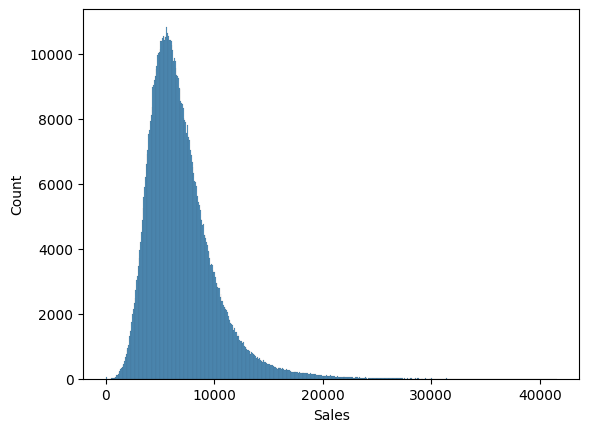

In [ ]:
sns.histplot(data=merged_df_train, x='Sales')

<Axes: xlabel='Sales', ylabel='Customers'>

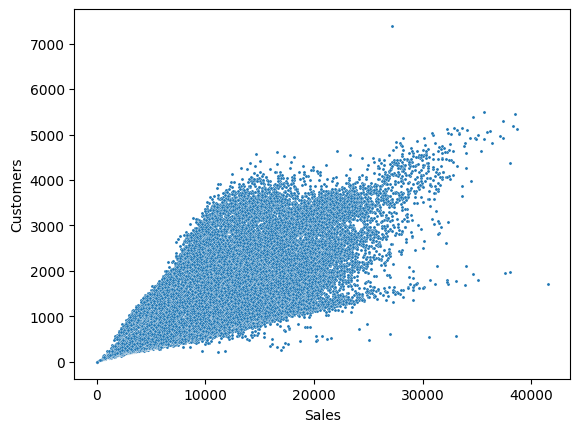

In [ ]:
sns.scatterplot(data=merged_df_train, x='Sales', y='Customers', s=5)

In [ ]:
merged_df_train.Sales.corr(merged_df_train.Customers)

0.8235967321975434

- Strong correlation between Sales adn Customers, but sadly we don't have numbers of Customer as input in Test.csv

<Axes: xlabel='Store', ylabel='Sales'>

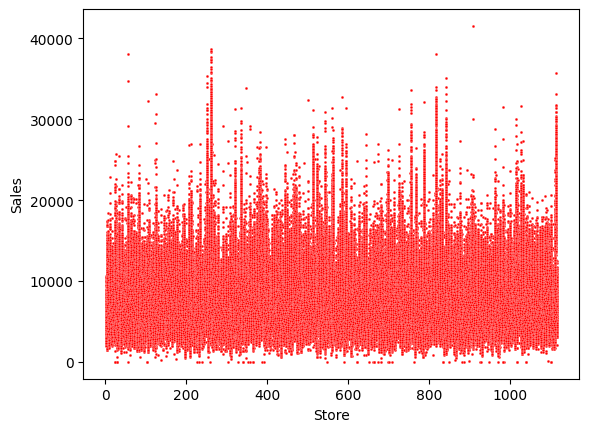

In [ ]:
sns.scatterplot(data=merged_df_train, x='Store', y='Sales', s=4, color=['r'])

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

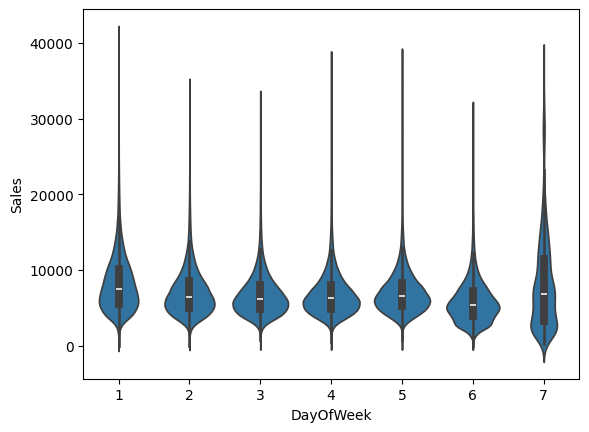

In [ ]:
sns.violinplot(merged_df_train, x='DayOfWeek', y='Sales')

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

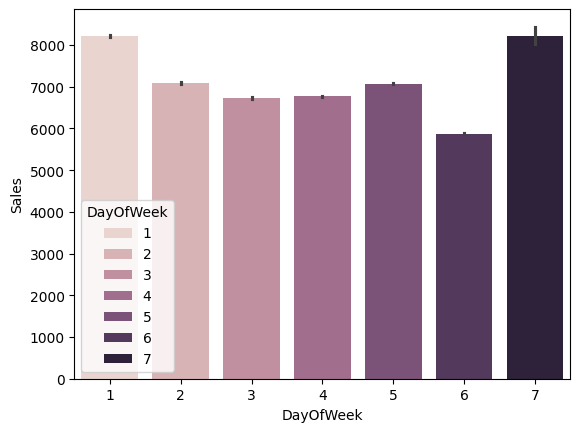

In [ ]:
sns.barplot(merged_df_train, x='DayOfWeek', y='Sales', hue='DayOfWeek')

<Axes: xlabel='Promo', ylabel='Sales'>

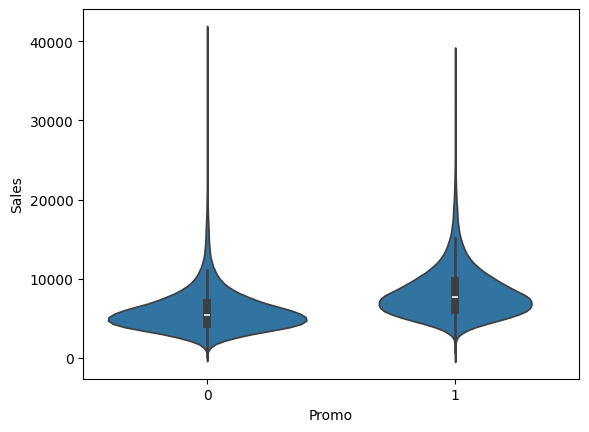

In [ ]:
sns.violinplot(merged_df_train, x='Promo', y='Sales')

<ipython-input-32-2f4c4f4147e9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(merged_df_train, x='Promo', y='Sales', palette=sns.color_palette('hls',2))


<Axes: xlabel='Promo', ylabel='Sales'>

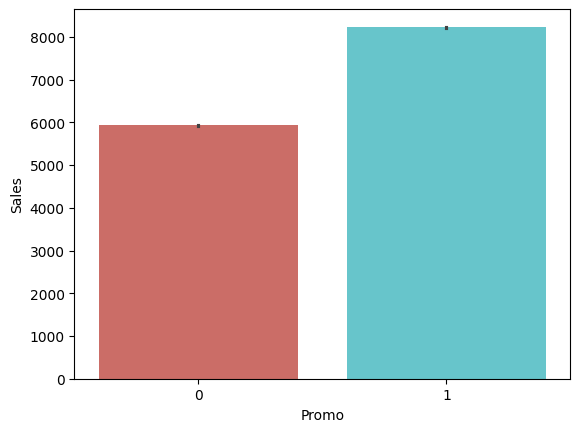

In [ ]:
sns.barplot(merged_df_train, x='Promo', y='Sales', palette=sns.color_palette('hls',2))

In [ ]:
merged_df_train.select_dtypes(include=['number']).corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

### Feature Engineering

In [ ]:
merged_df_train['Day'] = merged_df_train.Date.dt.day
merged_df_train['Month'] = merged_df_train.Date.dt.month
merged_df_train['Year'] = merged_df_train.Date.dt.year

merged_df_test['Day'] = merged_df_test.Date.dt.day
merged_df_test['Month'] = merged_df_test.Date.dt.month
merged_df_test['Year'] = merged_df_test.Date.dt.year

In [ ]:
sns.set(font_scale=0.6)

<Axes: xlabel='Day', ylabel='Sales'>

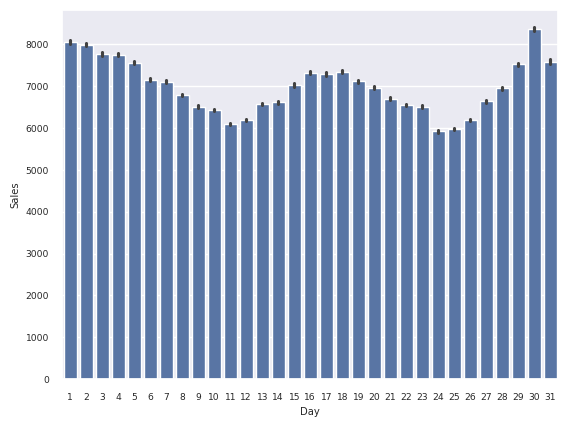

In [ ]:
sns.barplot(merged_df_train, x='Day', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

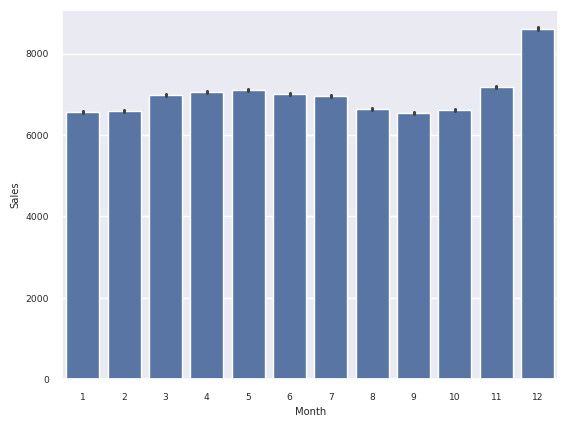

In [ ]:
sns.barplot(merged_df_train, x='Month', y='Sales')

<Axes: xlabel='Year', ylabel='Sales'>

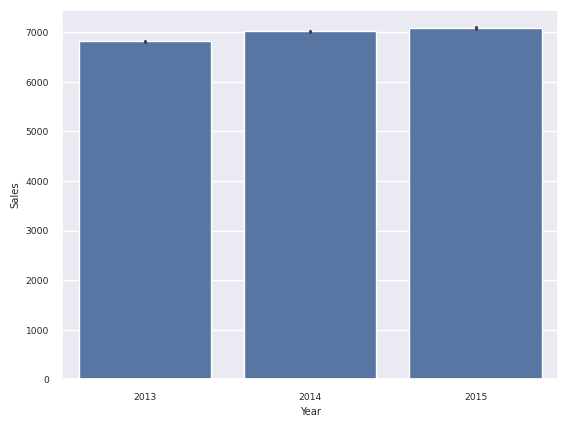

In [ ]:
sns.barplot(merged_df_train, x='Year', y='Sales')

## 4. Data Preparation

### Train/Validation/Test Split

In [ ]:
len(merged_df_train)

844392

In [ ]:
train_len = int(0.75 * len(merged_df_train))
train_len

633294

In [ ]:
sorted_df = merged_df_train.sort_values('Date')

In [ ]:
train_df, val_df = sorted_df[:train_len], sorted_df[train_len:]
len(train_df), len(val_df)

(633294, 211098)

In [ ]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [ ]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [ ]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_col = 'Sales'

- Taking some of the features as only for input for now

In [ ]:
merged_df_train[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [ ]:
train_input = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

val_input = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [ ]:
numerical_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']


In [ ]:
test_input = merged_df_test[input_cols].copy()

- Usually Store should be categorical but when we divide into its different subcategories then the number of columns will be significantly large

### Imputation, Scaling and Encoding

> Imputation

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(train_input[numerical_cols])


In [ ]:
train_input[numerical_cols] = imputer.transform(train_input[numerical_cols])
val_input[numerical_cols] = imputer.transform(val_input[numerical_cols])
test_input[numerical_cols] = imputer.transform(test_input[numerical_cols])


- A better approach to impute the missing value is to see the distribution of each columns and fill them accordingly with mean, median and other startegy

> Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_input[numerical_cols])

In [ ]:
train_input[numerical_cols] = scaler.transform(train_input[numerical_cols])
val_input[numerical_cols] = scaler.transform(val_input[numerical_cols])
test_input[numerical_cols] = scaler.transform(test_input[numerical_cols])


> Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_input[categorical_cols])


In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols])
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])


In [ ]:
train_input.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType',
       'Assortment', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

#### Extracting data out

In [ ]:
X_train = train_input[numerical_cols + encoded_cols]
X_val = val_input[numerical_cols + encoded_cols]

In [ ]:
X_test = test_input[numerical_cols + encoded_cols]

## 5. Baseline Model

In [ ]:
train_target.mean()

6873.17964168301

In [ ]:
def returnMean(input):
  return np.full(len(input), train_target.mean())

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(train_target, returnMean(X_train), squared=False)

3081.3506358126774

In [ ]:
mean_squared_error(val_target, returnMean(X_val), squared=False)

3176.0825298281384

In [ ]:
def randomGuess(input):
  # hi, lo = train_target.min(), train_target.max()
  hi, lo = 6800, 7000
  return np.random.random(len(input))*(hi-lo) + lo

mean_squared_error(train_target, randomGuess(X_train), squared=False)

3081.945183618072

## 6. Model Training
- Find out which models are applicable to the problem you are solving
- Train a basic version of every model which are applicable
- Identify the modeling approaches the work well and tune their hyperparameter
- Use a spreadsheet to keep track of your experiments and results

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression().fit(X_train, train_target)

In [ ]:
print(linreg.coef_.tolist())

[104.78133431296578, -99.79820185401448, 651.172904116103, 105.49513224189623, -88499513557606.58, -88499513558720.4, -88499513558991.17, -88499513558992.38, -88499513558601.56, -88499513558659.39, -88499513558592.27, -162329335491061.78, -162329335488784.8, -20529118752832.996, -20529118752764.996, -20529118752750.62, -20529118752482.977, -1543411913806381.8, -1543411913800969.0, -1543411913806491.5, -1543411913806735.0, -1864902342176751.0, -1864902342180311.8, -1864902342176016.8]


In [ ]:
print(X_train.columns.tolist())

['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c']


In [ ]:
train_pred = linreg.predict(X_train)
print(train_pred)

[ 7115.  10581.   7036.  ...  6243.   5999.   5618.5]


In [ ]:
mean_squared_error(train_target, train_pred, squared=False)

2741.5860353706703

In [ ]:
val_pred = linreg.predict(X_val)
print(val_pred)

[5618.5 5619.  5999.5 ... 8649.  8404.5 7844.5]


In [ ]:
mean_squared_error(val_target, val_pred, squared=False)

2817.656190781348

- Linear Regression is not doing well as compared to the baseline models

In [ ]:
def try_model(model):
  model.fit(X_train, train_target)

  train_pred = model.predict(X_train)
  val_pred = model.predict(X_val)

  train_error = mean_squared_error(train_target, train_pred, squared=False)
  val_error = mean_squared_error(val_target, val_pred, squared=False)

  print({"train error : " : train_error, "val error : " : val_error})

> Linear Models

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor


In [ ]:
try_model(LinearRegression())

{'train error : ': 2741.5860353706703, 'val error : ': 2817.656190781348}


In [ ]:
try_model(Ridge())

{'train error : ': 2741.5871950814444, 'val error : ': 2817.7784665409868}


In [ ]:
try_model(Lasso())

{'train error : ': 2741.7143904640566, 'val error : ': 2817.9472924045217}


In [ ]:
try_model(ElasticNet())

{'train error : ': 2879.0432103903954, 'val error : ': 2972.6658860503385}


In [ ]:
try_model(SGDRegressor())

{'train error : ': 2742.688880301041, 'val error : ': 2828.285168037101}


> Tree Based Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

{'train error : ': 0.0, 'val error : ': 1559.7378600480247}


- Even with overfitting Decision Tree is predicting pretty good

[Text(0.5, 0.9, 'Promo_0 <= 0.5\nsquared_error = 9494721.741\nsamples = 633294\nvalue = 6873.18'),
 Text(0.25, 0.7, 'DayOfWeek_1 <= 0.5\nsquared_error = 10053046.41\nsamples = 280741\nvalue = 8160.121'),
 Text(0.125, 0.5, 'Month <= 0.955\nsquared_error = 8559596.144\nsamples = 223344\nvalue = 7757.247'),
 Text(0.0625, 0.3, 'StoreType_b <= 0.5\nsquared_error = 7967330.328\nsamples = 210684\nvalue = 7631.861'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Day <= 0.35\nsquared_error = 13800173.481\nsamples = 12660\nvalue = 9843.895'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Month <= 0.955\nsquared_error = 12775230.673\nsamples = 57397\nvalue = 9727.788'),
 Text(0.3125, 0.3, 'Day <= 0.95\nsquared_error = 11907411.6\nsamples = 54232\nvalue = 9578.715'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Day <= 0.267\nsquared_error = 20739758.

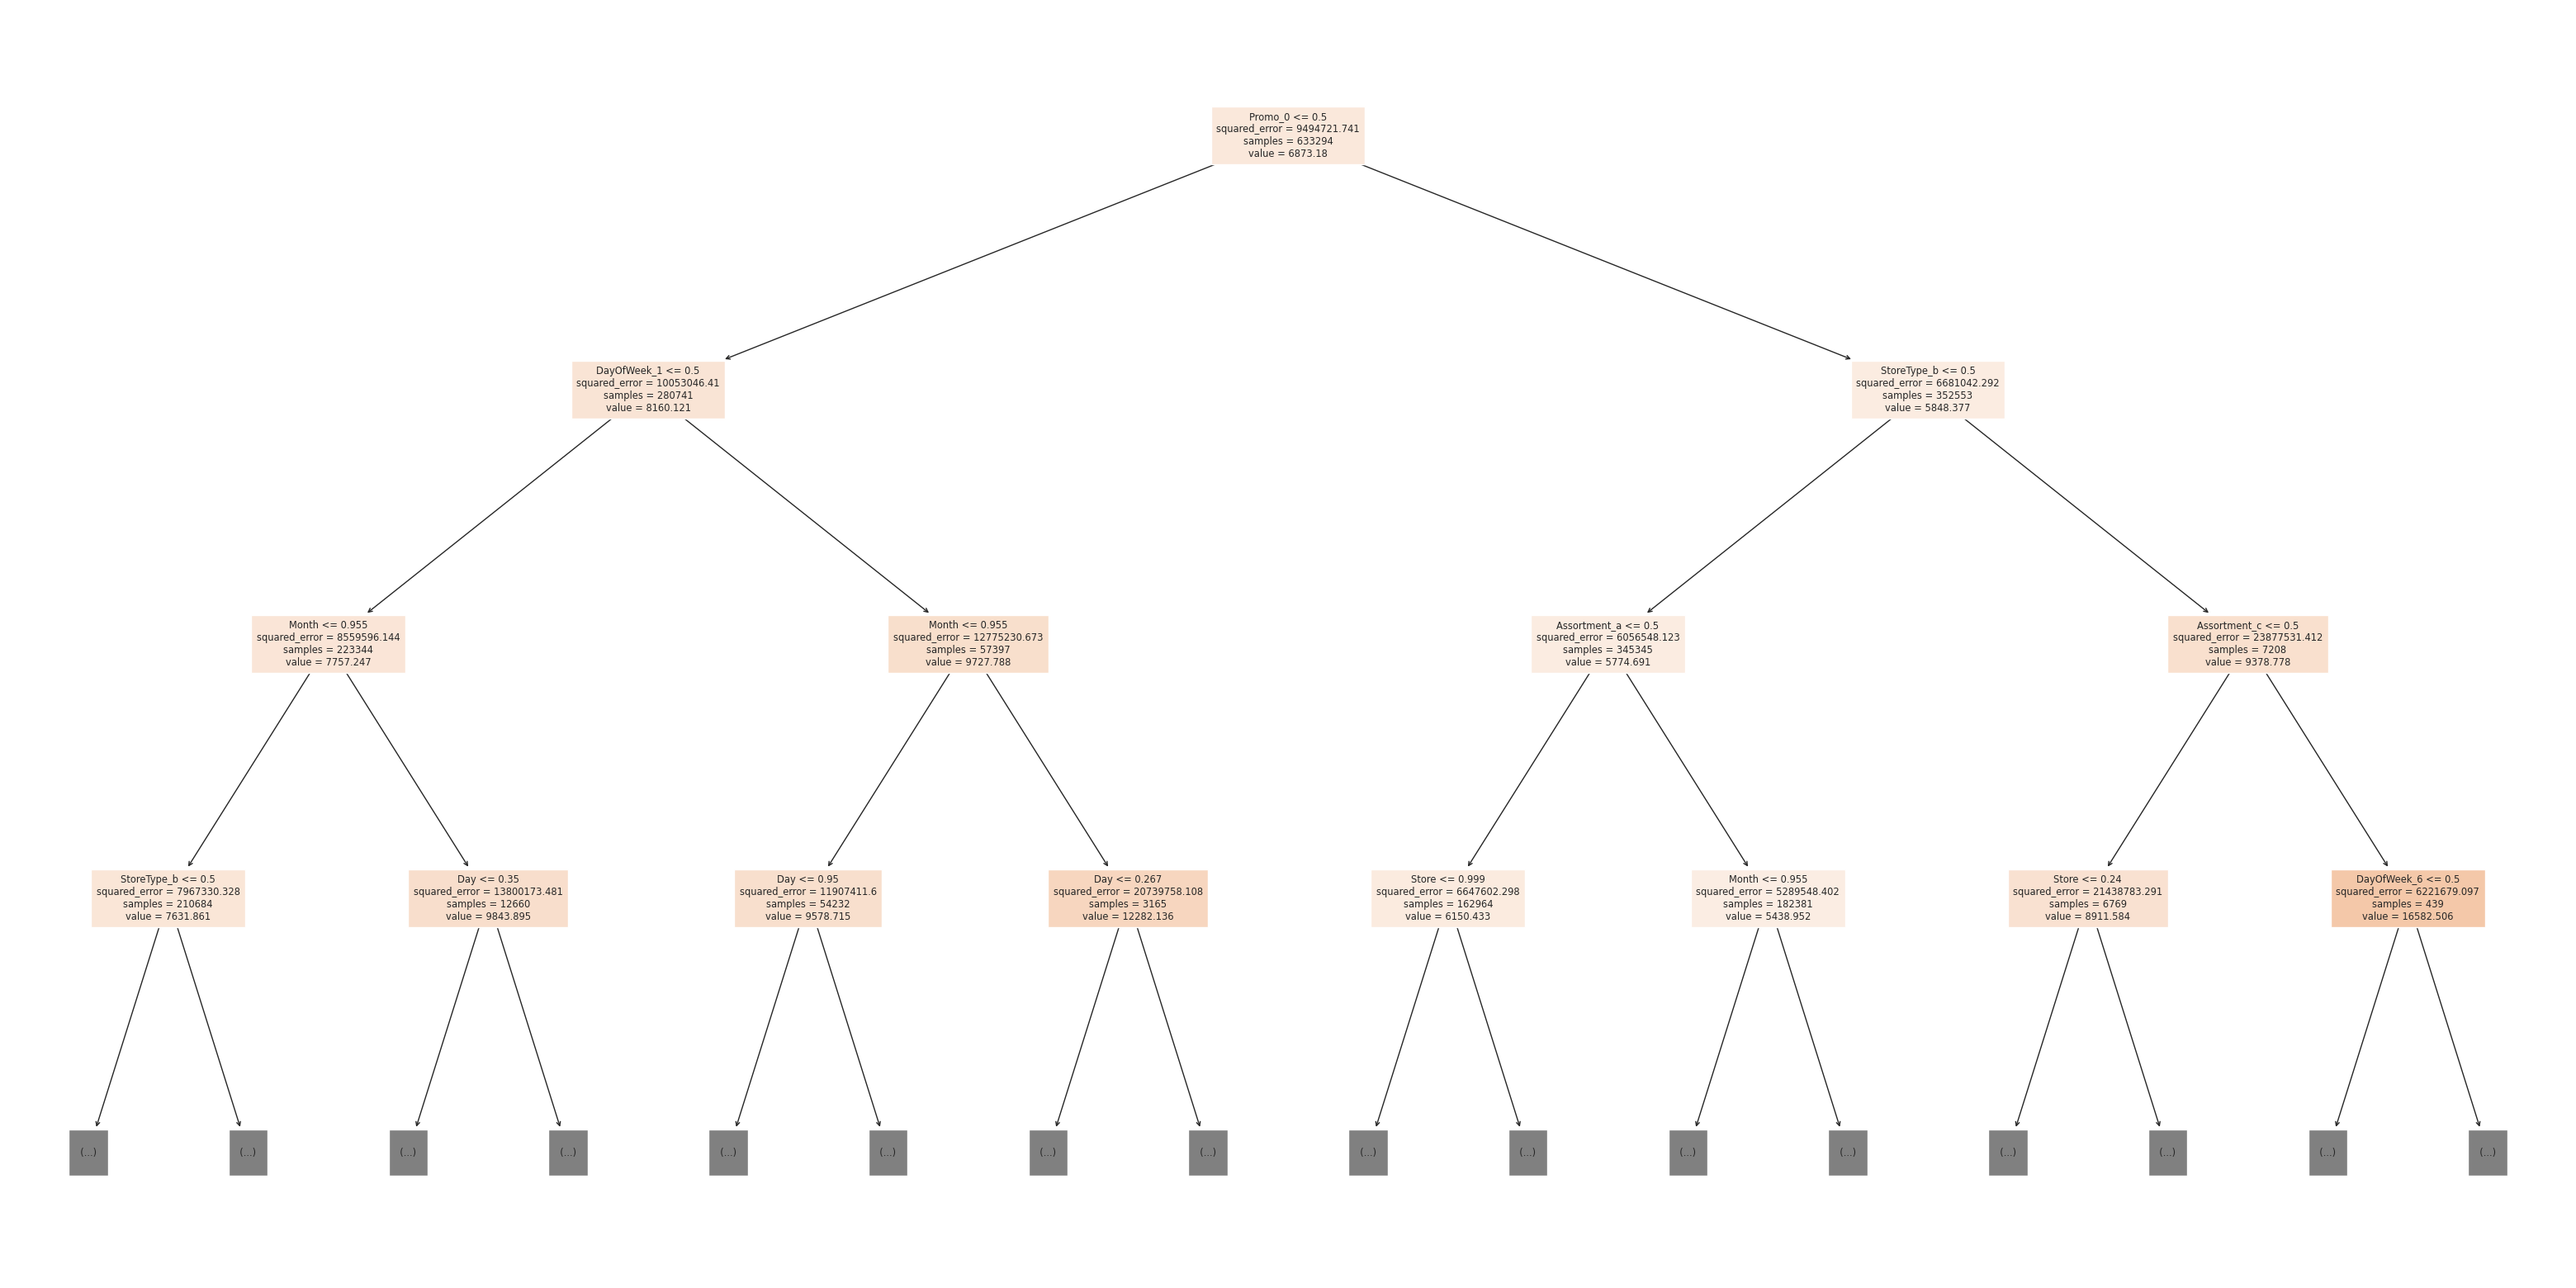

In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numerical_cols + encoded_cols)


> Let's try Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=20)
try_model(rf)

{'train error : ': 517.6751718026028, 'val error : ': 1396.2587846734004}
CPU times: user 1min 34s, sys: 2.1 s, total: 1min 36s
Wall time: 57.1 s


## 7. Regularization and Emsembling
- Gather more data --> more data helps in making model more powerful by learning more and more relationships and generalize the model better
- Include more feature --> more relevant features for predicting the target, the better the model gets
- Tune the hyperparameter of model --> Increase the capacity if the model while ensuring that it does not overfit
- Look at the specific examples where model make incorrect or bad predictions and gather some indights
- Combine results from different types of models (EMSEMBLING), or train another model using their results

> We can use

1. Hyperparameter Tuning
2. Grid Search
3. K_Fold Cross Validation
- In K-Fold cross validation we divide the training data into small chunks and then train using these data with replacement
4. Ensembling
5. Stacking

In [ ]:
rf_feat = rf.feature_importances_
rf_feat

array([6.08577433e-01, 4.90298415e-02, 4.72174228e-02, 9.16706445e-03,
       3.36236378e-02, 4.43197097e-03, 2.39532415e-03, 2.08193346e-03,
       5.70225783e-03, 6.82231256e-03, 4.56073208e-03, 6.93383116e-02,
       6.93642477e-02, 1.16914604e-03, 1.93093531e-04, 2.71813242e-05,
       2.24652904e-05, 1.30160460e-02, 2.26595870e-02, 1.02901583e-02,
       1.38822499e-02, 8.09192402e-03, 5.52821094e-03, 1.28074475e-02])

<Axes: ylabel='None'>

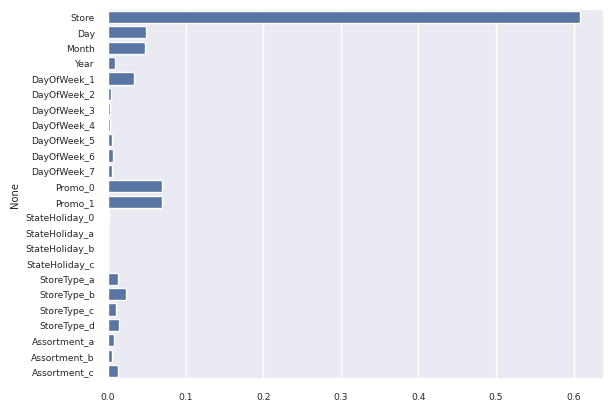

In [ ]:
sns.barplot(x=rf_feat, y=X_train.columns)

In [ ]:
feature_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_feat
}).sort_values('importance', ascending=False)
feature_df.head()

,feature,importance
0,Store,0.608577
12,Promo_1,0.069364
11,Promo_0,0.069338
1,Day,0.049030
2,Month,0.047217


<Axes: xlabel='importance', ylabel='feature'>

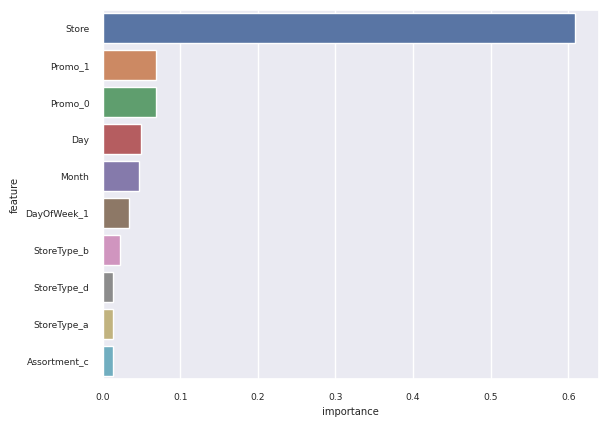

In [ ]:
sns.barplot(feature_df.head(10), x='importance', y='feature', hue='feature')

In [ ]:
def find_pred(model, input):
  if input['Open'] == 0:
    return 0

  input_df = pd.DataFrame([input])
  input_df['Date'] = pd.to_datetime(input_df.Date)
  input_df['Day'] = input_df.Date.dt.day
  input_df['Month'] = input_df.Date.dt.month
  input_df['Year'] = input_df.Date.dt.year
  input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
  input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  X_input = input_df[numerical_cols + encoded_cols]
  pred = model.predict(X_input)[0]
  print('Prediction of the model for the provided input is : ', pred)

In [ ]:
sample_input = {
  'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan
}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [ ]:
find_pred(rf, sample_input)

Prediction of the model for the provided input is :  4107.65


## Present your Work
- Create a presentation according to whom you are going to present
- Uderstand your audience --> figure out what they care most about
- Avoid showing codes to a non-tech guy
- Focus more on metrics that are relevant for the business
- Talk about feature importance and how to interpret results
- Explain the strengths and limitations of the model
- Explain how the model can be improved over time

## Submition on Kaggle

In [ ]:
test_pred = rf.predict(X_test)
test_pred

array([ 4107.65,  7750.75,  8794.25, ...,  6032.95, 20738.55,  6717.4 ])

In [ ]:
submission_df = pd.read_csv('/content/rossmann-store-sales/sample_submission.csv')
submission_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
submission_df['Sales'] = test_pred * test_df['Open'].fillna(1).astype('float')

In [ ]:
submission_df.head()

,Id,Sales
0,1,4107.65
1,2,7750.75
2,3,8794.25
3,4,6874.60
4,5,6628.50


In [ ]:
submission_df.isnull().sum()

Id       0
Sales    0
dtype: int64

In [ ]:
submission_df.fillna(0, inplace=True)


In [ ]:
submission_df.isnull().sum()

Id       0
Sales    0
dtype: int64

In [ ]:
submission_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

Id,Sales
1,4107.65
2,7750.75
3,8794.25
4,6874.6
5,6628.5
6,5699.85
7,8110.75
8,8292.45
9,5928.2


In [ ]:
submission_df.head()

0    4107.65
1    7750.75
2    8794.25
3     6874.6
4     6628.5
Name: Open, dtype: object

In [ ]:
from IPython.display import FileLink

In [ ]:
FileLink('submission.csv')

/content/submission.csv